In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
start='2010-01-02'
end='2022-06-21'

df=pdr.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [9]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [10]:
#removing unecessary datas from the dataset

df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500.0
1,6.084,4.660,5.158,4.766,85935500.0
2,5.184,4.054,5.000,4.392,41094000.0
3,4.620,3.742,4.600,3.840,25699000.0
4,4.000,3.166,4.000,3.222,34334500.0


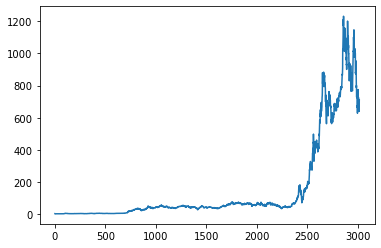

In [11]:
plt.plot(df.Close)

In [12]:
#100 days Moving average

ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3011    871.999496
3012    869.550496
3013    866.643496
3014    863.962296
3015    861.699296
Name: Close, Length: 3016, dtype: float64

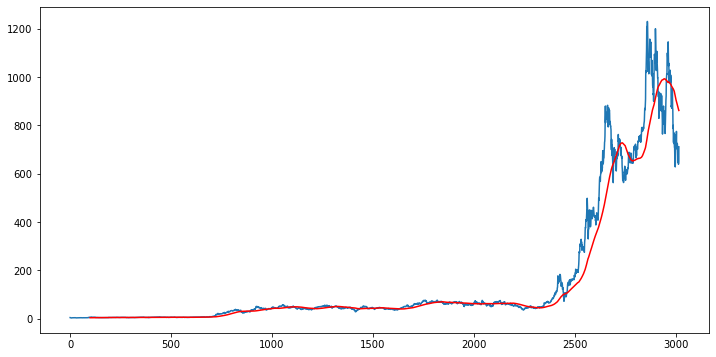

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3011    913.779447
3012    913.619897
3013    913.137797
3014    912.718747
3015    912.612347
Name: Close, Length: 3016, dtype: float64

Text(0, 0.5, 'Price $')

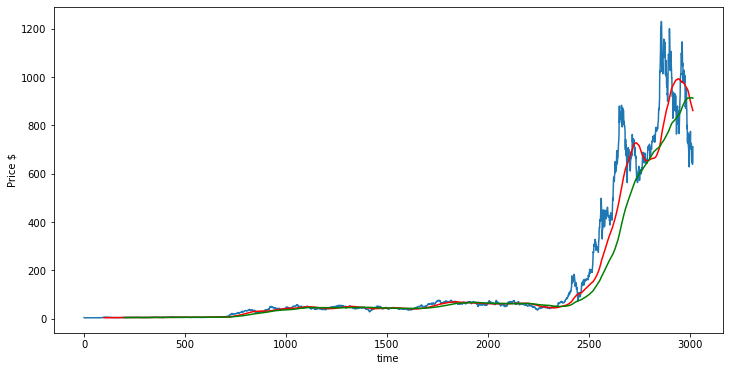

In [15]:
#chart for 200 MA

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')
plt.xlabel('time')
plt.ylabel('Price $')

In [16]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)



(2111, 1)
(905, 1)


In [17]:
#import min max scaler from sklearn

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       ...,
       [0.90658176],
       [0.85449616],
       [0.874675  ]])

In [19]:
data_training_array.shape

(2111, 1)

In [20]:
#dividing data into x and y train


x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [21]:
#Machine Learning setup

from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [22]:
x_train.shape

(2011, 100, 1)

In [23]:
model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
             input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 32s 356ms/step - loss: 0.0606
Epoch 2/50
63/63 [==============================] - 23s 370ms/step - loss: 0.0118
Epoch 3/50
63/63 [==============================] - 23s 370ms/step - loss: 0.0095
Epoch 4/50
63/63 [==============================] - 23s 372ms/step - loss: 0.0091
Epoch 5/50
63/63 [==============================] - 23s 359ms/step - loss: 0.0084
Epoch 6/50
63/63 [==============================] - 24s 383ms/step - loss: 0.0082
Epoch 7/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0077
Epoch 8/50
63/63 [==============================] - 22s 344ms/step - loss: 0.0079
Epoch 9/50
63/63 [==============================] - 23s 360ms/step - loss: 0.0078
Epoch 10/50
63/63 [==============================] - 22s 343ms/step - loss: 0.0075
Epoch 11/50
63/63 [==============================] - 22s 349ms/step - loss: 0.0072
Epoch 12/50
63/63 [==============================] - 22s 343ms/step - loss: 0.0073
Epoch 13/50
6

In [26]:
model.save('keras_model.h5')

In [27]:
 past_100_days=data_training.tail(100)

In [28]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\heyro\AppData\Local\Temp\ipykernel_9484\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [29]:
final_df.head()

,Close
0,66.601997
1,68.400002
2,68.900002
3,69.986000
4,68.589996


In [30]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(1005, 1)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(905, 100, 1)
(905,)


In [33]:
#setting up predictions


y_p=model.predict(x_test)


29/29 [==============================] - 4s 91ms/step


In [34]:
y_p.shape

(905, 1)

In [35]:
y_p

array([[0.04030412],
       [0.04077697],
       [0.04121304],
       [0.04159632],
       [0.04191694],
       [0.04217017],
       [0.04235396],
       [0.04246789],
       [0.04251063],
       [0.04248947],
       [0.04241338],
       [0.04229462],
       [0.04214352],
       [0.04197258],
       [0.04179472],
       [0.0416213 ],
       [0.04146314],
       [0.04132694],
       [0.04121864],
       [0.04114228],
       [0.04109928],
       [0.04109293],
       [0.04112238],
       [0.04118055],
       [0.04125553],
       [0.04133439],
       [0.04139966],
       [0.04143876],
       [0.04143435],
       [0.04138339],
       [0.04128373],
       [0.04114312],
       [0.0409736 ],
       [0.04078311],
       [0.04057544],
       [0.04035747],
       [0.04014012],
       [0.03993362],
       [0.03974727],
       [0.03959036],
       [0.03947234],
       [0.03939539],
       [0.03936237],
       [0.03937399],
       [0.03943425],
       [0.03953046],
       [0.03964752],
       [0.039

In [36]:
y_test

array([0.02764053, 0.02838418, 0.02936733, 0.02922664, 0.02822506,
       0.02666743, 0.02459728, 0.0279755 , 0.02762713, 0.02828871,
       0.02716654, 0.02872585, 0.03006743, 0.03027009, 0.03083285,
       0.02998034, 0.0311829 , 0.03145255, 0.03142576, 0.03313246,
       0.03127669, 0.02838083, 0.02647314, 0.02579314, 0.02284703,
       0.0235823 , 0.01949894, 0.02464082, 0.02297264, 0.02594388,
       0.02576466, 0.02196604, 0.02033136, 0.02323392, 0.02612644,
       0.02619176, 0.02672437, 0.027803  , 0.02818654, 0.02603264,
       0.02771255, 0.02798388, 0.02819491, 0.02064959, 0.02009018,
       0.01819254, 0.01884909, 0.0197753 , 0.01966476, 0.01984564,
       0.02173993, 0.02144683, 0.02231609, 0.02242998, 0.02384693,
       0.0231552 , 0.0215289 , 0.02124249, 0.02242161, 0.02224909,
       0.02163944, 0.02090249, 0.02159087, 0.02121569, 0.02069983,
       0.01880219, 0.01938505, 0.02006505, 0.01991264, 0.02273984,
       0.02360072, 0.01939845, 0.01781904, 0.0163418 , 0.01629

In [40]:
scaler.scale_

array([0.00083744])

In [38]:
scale_factor= 1/0.00083744
y_predicted=y_p * scale_factor
y_test=y_test * scale_factor

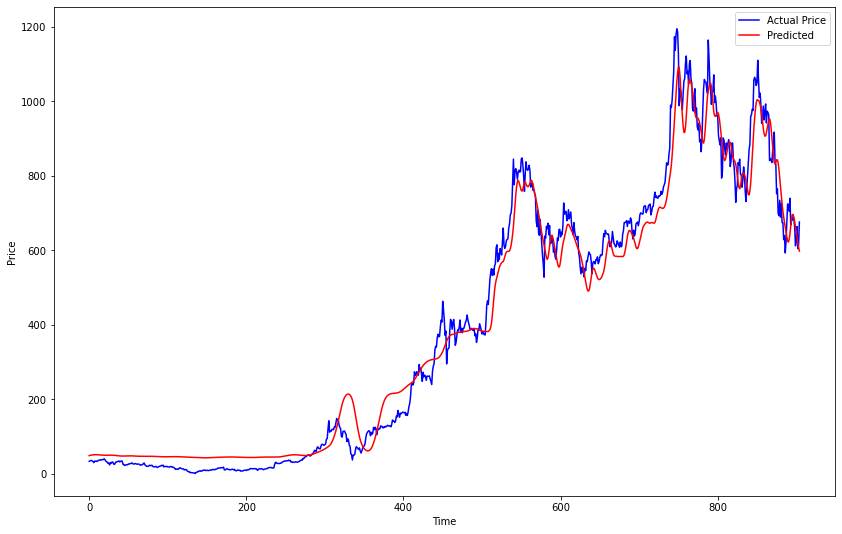

In [39]:
plt.figure(figsize=(14,9))
plt.plot(y_test,'b',label='Actual Price')
plt.plot(y_predicted,'r',label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
